In [1]:
!pip install ipython-autotime
%load_ext autotime

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
time: 1.52 ms


In [3]:
%cd /gdrive/My Drive/KISTI_STOCK/DATA

/gdrive/My Drive/KISTI_STOCK/DATA
time: 4.92 ms


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

time: 346 ms


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
def data_info(df) :
    print(f'shape : {df.shape}')
    print(f'dtypes : {df.dtypes}')
    display(df.head())

time: 2.28 ms


In [6]:
stock = pd.read_csv("SSE_2018-01-01_2020-06-30.csv")
nasdaq = pd.read_csv("NASDAQ.csv")

data_info(stock)
data_info(nasdaq)

shape : (613, 7)
dtypes : Date       object
Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object


,Date,Open,High,Low,Close,Volume,Change
0,2018-01-02,51380,51400,50780,51020,169485,0.001177
1,2018-01-03,52540,52560,51420,51620,200270,0.011760
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461
3,2018-01-05,51300,52120,51200,52120,189623,0.020360
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919


shape : (628, 7)
dtypes : 날짜      object
종가      object
오픈      object
고가      object
저가      object
거래량     object
변동 %    object
dtype: object


,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020년 06월 30일,"10,058.76","9,875.29","10,085.59","9,863.67",1.10B,1.87%
1,2020년 06월 29일,"9,874.15","9,771.72","9,877.34","9,663.61",977.01M,1.20%
2,2020년 06월 26일,"9,757.22","9,995.12","10,000.67","9,749.07",2.67B,-2.59%
3,2020년 06월 25일,"10,017.00","9,899.36","10,023.28","9,810.47",1.06B,1.09%
4,2020년 06월 24일,"9,909.17","10,092.92","10,137.50","9,842.22",1.26B,-2.19%


time: 68.5 ms


In [7]:
nasdaq.columns = ['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change']

time: 1.86 ms


In [8]:
def process_Date(df):
    
    regex_pat = re.compile(r'[가-힣] ')
    df['Date'] = df.Date.replace(regex_pat, '-')
    regex_pat = re.compile(r'[가-힣]')
    df['Date'] = df.Date.replace(regex_pat, '')
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return df

time: 5.89 ms


In [9]:
stock = process_Date(stock)
nasdaq = process_Date(nasdaq)

data_info(stock)
data_info(nasdaq)

shape : (613, 7)
dtypes : Date      datetime64[ns]
Open               int64
High               int64
Low                int64
Close              int64
Volume             int64
Change           float64
dtype: object


,Date,Open,High,Low,Close,Volume,Change
0,2018-01-02,51380,51400,50780,51020,169485,0.001177
1,2018-01-03,52540,52560,51420,51620,200270,0.011760
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461
3,2018-01-05,51300,52120,51200,52120,189623,0.020360
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919


shape : (628, 7)
dtypes : Date      datetime64[ns]
Close             object
Open              object
High              object
Low               object
Volume            object
Change            object
dtype: object


,Date,Close,Open,High,Low,Volume,Change
0,2020-06-30,"10,058.76","9,875.29","10,085.59","9,863.67",1.10B,1.87%
1,2020-06-29,"9,874.15","9,771.72","9,877.34","9,663.61",977.01M,1.20%
2,2020-06-26,"9,757.22","9,995.12","10,000.67","9,749.07",2.67B,-2.59%
3,2020-06-25,"10,017.00","9,899.36","10,023.28","9,810.47",1.06B,1.09%
4,2020-06-24,"9,909.17","10,092.92","10,137.50","9,842.22",1.26B,-2.19%


time: 61.3 ms


In [10]:
nasdaq.sort_values(by='Date', inplace=True)
nasdaq.head()

,Date,Close,Open,High,Low,Volume,Change
627,2018-01-02,"7,006.90","6,937.65","7,006.91","6,924.08",462.20M,1.50%
626,2018-01-03,"7,065.53","7,017.07","7,069.15","7,016.70",483.92M,0.84%
625,2018-01-04,"7,077.91","7,089.50","7,098.05","7,072.38",493.88M,0.18%
624,2018-01-05,"7,136.56","7,105.74","7,137.04","7,097.08",476.41M,0.83%
623,2018-01-08,"7,157.39","7,135.38","7,161.35","7,124.09",497.21M,0.29%


time: 25.8 ms


In [11]:
def process_Volume(volume):
    if volume == '-':
        return 0
    
    scale = volume[-1]
    val = float(volume[:-1])
    
    if scale == 'K':
        val = val*1000
    elif scale == 'M':
        val = val*1e6
    elif scale == 'B':
        val = val*1e9
        
    return val

time: 7.19 ms


In [12]:
nasdaq['Volume'] = nasdaq['Volume'].apply(process_Volume)
nasdaq.head()

,Date,Close,Open,High,Low,Volume,Change
627,2018-01-02,"7,006.90","6,937.65","7,006.91","6,924.08",462200000.0,1.50%
626,2018-01-03,"7,065.53","7,017.07","7,069.15","7,016.70",483920000.0,0.84%
625,2018-01-04,"7,077.91","7,089.50","7,098.05","7,072.38",493880000.0,0.18%
624,2018-01-05,"7,136.56","7,105.74","7,137.04","7,097.08",476410000.0,0.83%
623,2018-01-08,"7,157.39","7,135.38","7,161.35","7,124.09",497210000.0,0.29%


time: 33.5 ms


In [13]:
nasdaq['Close'] = nasdaq['Close'].str.replace(",", "")
nasdaq['Open'] = nasdaq['Open'].str.replace(",", "")
nasdaq['High'] = nasdaq['High'].str.replace(",", "")
nasdaq['Low'] = nasdaq['Low'].str.replace(",", "")

time: 10.3 ms


In [14]:
nasdaq = nasdaq.astype({'Close' : 'float',
                    'Open' : 'float',
                    'High' : 'float',
                    'Low' : 'float'})

time: 6.48 ms


In [15]:
stock.isnull().sum()
nasdaq.isnull().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

time: 9.58 ms


In [16]:
setidx_stock = stock.set_index('Date')
setidx_nasdaq = nasdaq.set_index('Date')

data_info(setidx_stock)
data_info(setidx_nasdaq)

shape : (613, 6)
dtypes : Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


shape : (628, 6)
dtypes : Close     float64
Open      float64
High      float64
Low       float64
Volume    float64
Change     object
dtype: object


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,7006.90,6937.65,7006.91,6924.08,462200000.0,1.50%
2018-01-03,7065.53,7017.07,7069.15,7016.70,483920000.0,0.84%
2018-01-04,7077.91,7089.50,7098.05,7072.38,493880000.0,0.18%
2018-01-05,7136.56,7105.74,7137.04,7097.08,476410000.0,0.83%
2018-01-08,7157.39,7135.38,7161.35,7124.09,497210000.0,0.29%


time: 47.2 ms


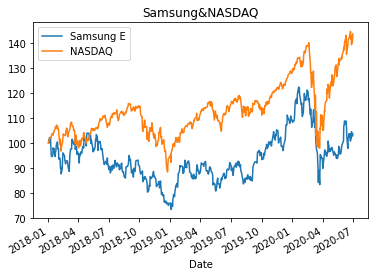

time: 271 ms


In [17]:
scaling_stock = setidx_stock['Close']/setidx_stock['Close'].iloc[0] *100
scaling_nasdaq = setidx_nasdaq['Close']/setidx_nasdaq['Close'].iloc[0] *100

scaling_stock.plot()
scaling_nasdaq.plot()
plt.title("Samsung&NASDAQ")
plt.legend(['Samsung E', 'NASDAQ'])
plt.show()

In [18]:
heatmap_data = pd.merge(stock[['Date','Close', 'Volume']],
                        nasdaq[['Date','Close', 'Volume']],
                        on='Date',
                        how='outer')

data_info(heatmap_data)

shape : (647, 5)
dtypes : Date        datetime64[ns]
Close_x            float64
Volume_x           float64
Close_y            float64
Volume_y           float64
dtype: object


,Date,Close_x,Volume_x,Close_y,Volume_y
0,2018-01-02,51020.0,169485.0,7006.90,462200000.0
1,2018-01-03,51620.0,200270.0,7065.53,483920000.0
2,2018-01-04,51080.0,233909.0,7077.91,493880000.0
3,2018-01-05,52120.0,189623.0,7136.56,476410000.0
4,2018-01-08,52020.0,167673.0,7157.39,497210000.0


time: 30.2 ms


In [19]:
heatmap_data.columns = ['Date', 'Close_ss', 'Volume_ss', 'Close_n', 'Volume_n']

time: 1.96 ms


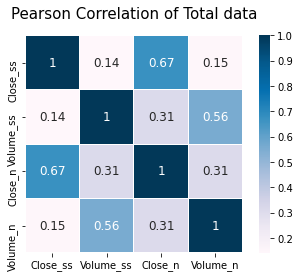

time: 304 ms


In [20]:
colormap = plt.cm.PuBu
plt.figure(figsize=(6, 4))
plt.title("Pearson Correlation of Total data", y = 1.05, size = 15)
sns.heatmap(heatmap_data[['Close_ss', 'Volume_ss', 'Close_n', 'Volume_n']].astype(float).corr(),
            linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap,
            linecolor = "white", annot = True,
            annot_kws = {"size" : 12})

In [21]:
setidx_nasdaq.columns = ['Close_n', 'Open_n', 'High_n', 'Low_n', 'Volume_n', 'Change_n']

time: 2.49 ms


In [22]:
corr_data = pd.merge(setidx_stock, setidx_nasdaq, left_index=True, right_index=True, how='outer')

time: 7.89 ms


In [23]:
data_info(corr_data)

shape : (647, 12)
dtypes : Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
Change      float64
Close_n     float64
Open_n      float64
High_n      float64
Low_n       float64
Volume_n    float64
Change_n     object
dtype: object


,Open,High,Low,Close,Volume,Change,Close_n,Open_n,High_n,Low_n,Volume_n,Change_n
Date,,,,,,,,,,,,
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,7006.90,6937.65,7006.91,6924.08,462200000.0,1.50%
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,7065.53,7017.07,7069.15,7016.70,483920000.0,0.84%
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,7077.91,7089.50,7098.05,7072.38,493880000.0,0.18%
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,7136.56,7105.74,7137.04,7097.08,476410000.0,0.83%
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,7157.39,7135.38,7161.35,7124.09,497210000.0,0.29%


time: 47.4 ms


In [24]:
corr_data.isnull().sum()

Open        34
High        34
Low         34
Close       34
Volume      34
Change      34
Close_n     19
Open_n      19
High_n      19
Low_n       19
Volume_n    19
Change_n    19
dtype: int64

time: 15.9 ms


In [25]:
corr_data = corr_data.dropna(axis=0)

time: 6.77 ms


In [26]:
data_info(corr_data)
corr_data.isnull().sum()

shape : (594, 12)
dtypes : Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
Change      float64
Close_n     float64
Open_n      float64
High_n      float64
Low_n       float64
Volume_n    float64
Change_n     object
dtype: object


,Open,High,Low,Close,Volume,Change,Close_n,Open_n,High_n,Low_n,Volume_n,Change_n
Date,,,,,,,,,,,,
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,7006.90,6937.65,7006.91,6924.08,462200000.0,1.50%
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,7065.53,7017.07,7069.15,7016.70,483920000.0,0.84%
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,7077.91,7089.50,7098.05,7072.38,493880000.0,0.18%
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,7136.56,7105.74,7137.04,7097.08,476410000.0,0.83%
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,7157.39,7135.38,7161.35,7124.09,497210000.0,0.29%


Open        0
High        0
Low         0
Close       0
Volume      0
Change      0
Close_n     0
Open_n      0
High_n      0
Low_n       0
Volume_n    0
Change_n    0
dtype: int64

time: 38.1 ms


In [27]:
re = corr_data.corr(method='pearson')
print(re)

              Open      High       Low  ...    High_n     Low_n  Volume_n
Open      1.000000  0.996196  0.996841  ...  0.590958  0.590601  0.143727
High      0.996196  1.000000  0.995909  ...  0.591171  0.588110  0.157657
Low       0.996841  0.995909  1.000000  ...  0.597384  0.598900  0.130639
Close     0.749832  0.755031  0.752494  ...  0.673908  0.675254  0.150964
Volume    0.182904  0.204006  0.160564  ...  0.342168  0.280344  0.558059
Change   -0.010980  0.026400  0.025022  ...  0.047268  0.065991 -0.021449
Close_n   0.589438  0.589215  0.597316  ...  0.995555  0.996072  0.305824
Open_n    0.589712  0.588466  0.597357  ...  0.996822  0.995778  0.315946
High_n    0.590958  0.591171  0.597384  ...  1.000000  0.993285  0.345124
Low_n     0.590601  0.588110  0.598900  ...  0.993285  1.000000  0.277543
Volume_n  0.143727  0.157657  0.130639  ...  0.345124  0.277543  1.000000

[11 rows x 11 columns]
time: 29 ms


In [28]:
corr = lambda p : p['Close'].corr(p['Close_n'])
re_close =  corr(corr_data)

print(re_close)

0.6727124168444573
time: 5.04 ms


In [29]:
corr_19 = corr_data.loc['2019-01-02':'2020-06-30']
corr_19.head()

,Open,High,Low,Close,Volume,Change,Close_n,Open_n,High_n,Low_n,Volume_n,Change_n
Date,,,,,,,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,7847664.0,0.001292,6665.94,6506.91,6693.71,6506.88,581370000.0,0.46%
2019-01-03,38300.0,38550.0,37450.0,37600.0,12471493.0,-0.029677,6463.50,6584.77,6600.21,6457.13,667440000.0,-3.04%
2019-01-04,37450.0,37600.0,36850.0,37450.0,14108958.0,-0.003989,6738.86,6567.14,6760.69,6554.24,688190000.0,4.26%
2019-01-07,38000.0,38900.0,37800.0,38750.0,12748997.0,0.034713,6823.47,6757.53,6855.60,6741.40,623290000.0,1.26%
2019-01-08,38000.0,39200.0,37950.0,38100.0,12756554.0,-0.016774,6897.00,6893.44,6909.58,6795.86,599420000.0,1.08%


time: 42.2 ms


In [31]:
corr = lambda p : p['Close'].corr(p['Close_n'])
re_close =  corr(corr_19)

print(re_close)

0.80395317684564
time: 2.91 ms
